<h1 style = 'text-align: center;'> Brain Stroke Prediction </h1>

## Madiraju Bharadwaj


### Problem Definition:

In our modern life, we are in a competitive state all the time to progress in our life but due to this we are giving negligence importance to our health. Through this application we are creating mulitple machine learning models which can predict whether we have a particular disease or not to save time.

### Importing necessary libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv
from sklearn.preprocessing import StandardScaler, MinMaxScaler, KBinsDiscretizer
from sklearn.linear_model import LogisticRegression 
from sklearn import svm 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mutual_info_score
from sklearn import datasets
from sklearn.metrics import roc_curve,roc_auc_score


import time
import os
import warnings
warnings.filterwarnings("ignore")

### Brief  discussion on  the  python  packages  used  for  implementation  of  Machine  learning  algorithms pertaining to your project.


#### Pandas:

Pandas is a Python library that is used for data manipulation and analysis. It provides data structures such as Series (1-dimensional) and DataFrame (2-dimensional) to store and manipulate data in a way that is similar to using a spreadsheet.



#### Numpy:  

The numpy library is a powerful library for numerical computations in Python. It provides a variety of features such as multi-dimensional arrays, mathematical functions, and tools for linear algebra and Fourier analysis. It is widely used in scientific computing and data analysis.  

#### Matplotlib:  

Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. And its used to plot graphs.  

#### Seaborn:  

Seaborn is a data visualization library for Python that is built on top of the popular data visualization library Matplotlib. It provides a high-level interface for creating informative and attractive statistical graphics.  

#### Sklearn:  

Scikit-learn (sklearn) is a machine learning library for Python. It provides a range of supervised and unsupervised learning algorithms in Python. Some of the popular algorithms include linear regression, logistic regression, support vector machines, decision trees, random forests, and neural networks. It also provides tools for model evaluation and selection, pre-processing, and feature extraction.  
   
#### StandardScaler:  

StandardScaler is a pre-processing method in the scikit-learn (sklearn) library used for standardizing the features of a dataset. It normalizes the features by subtracting the mean and scaling to unit variance.  

#### MinMaxScaler:  

MinMaxScaler is a pre-processing method in the scikit-learn (sklearn) library used for scaling the features of a dataset. It scales the features between a given range, usually between 0 and 1. It can be used when the features have different units and you want to bring all of them to the same scale.  



#### KBinsDiscretizer:  

KBinsDiscretizer is a pre-processing method in scikit-learn (sklearn) library that is used for discretizing continuous features into discrete features, also known as binning.   
 
#### GridSearchCV:  

GridSearchCV is a method in the scikit-learn (sklearn) library that is used for hyperparameter tuning. It is a way of systematically working through multiple combinations of parameter tunes, cross-validating as it goes to determine which tune gives the best performance.   

#### Classification_report:  

The classification_report is a function in the scikit-learn (sklearn) library that is used to generate a report of various classification metrics for a given dataset and model.   



#### Reading File

In [2]:
file = read_csv('/Users/bharath/Python For Machine Learning/Project/brain_stroke.csv')

In [3]:
# converting dataset into 2d array

df = pd.DataFrame(file) 

### Brief discussion on the datasets used in the project

#### Features:

gender: "Male", "Female" or "Other"  
age: age of the patient  
hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension  
heart-disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease  
ever-married: "No" or "Yes"  
worktype: "children", "govt-job", "never-worked", "private" or "self-employed"  
residence-type: "Rural" or "Urban"  
avg-glucose-level: average glucose level in blood  
bmi: body mass index  
smoking-status: "formerly smoked", "never smoked", "smokes" or "Unknown"  

#### Target:

stroke: 1 if the patient had a stroke or 0 if not  


In [4]:
# to view first most values

df.head() 

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [5]:
# to get shape of the data set

df.shape 

(4981, 11)

In [6]:
# to get complete information about dataset

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [7]:
# to check the start, final and step values of data

df.index 

RangeIndex(start=0, stop=4981, step=1)

In [8]:
# checking null values

df.isnull() 

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
4976,False,False,False,False,False,False,False,False,False,False,False
4977,False,False,False,False,False,False,False,False,False,False,False
4978,False,False,False,False,False,False,False,False,False,False,False
4979,False,False,False,False,False,False,False,False,False,False,False


In [9]:
# getting count of total null values in particular column

df.isnull().sum() 

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
# checking if there are any duplicates

df.duplicated().sum()

0

In [11]:
# checking the data type of the each feature

df.dtypes 

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [12]:
# to get statistical summary of the dataset

df.describe() 

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


Pair plot is a type of plot used to visualize the relationship between multiple variables in a dataset. In Seaborn, the pairplot() function is used to create a pair plot.

You can also customize the appearance of the pair plot by passing in additional parameters to the pairplot() function, such as the hue parameter to color the points by a categorical variable

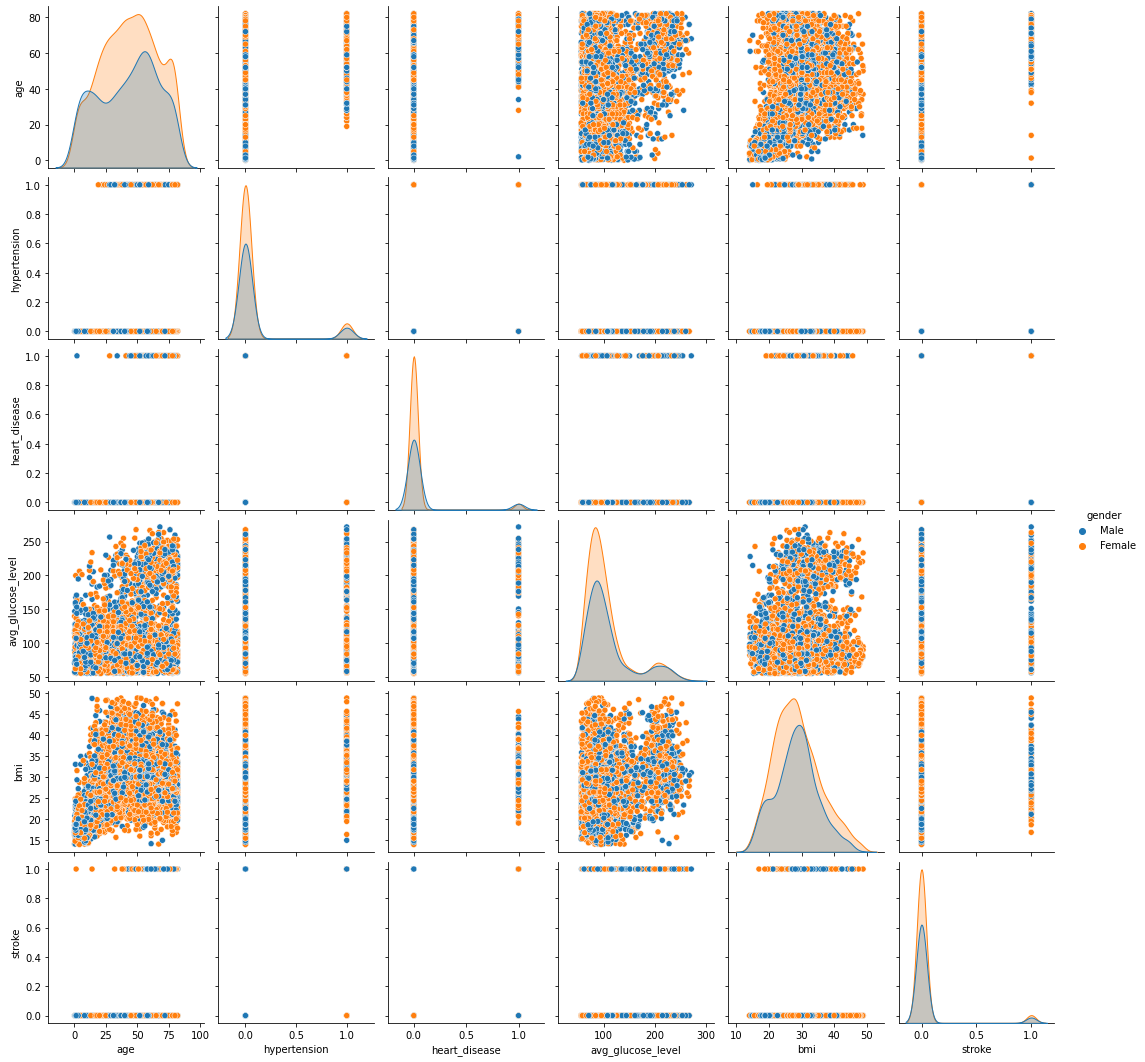

In [13]:
sns.pairplot(data = df, hue = 'gender') # pairplot with hue gender
plt.show()

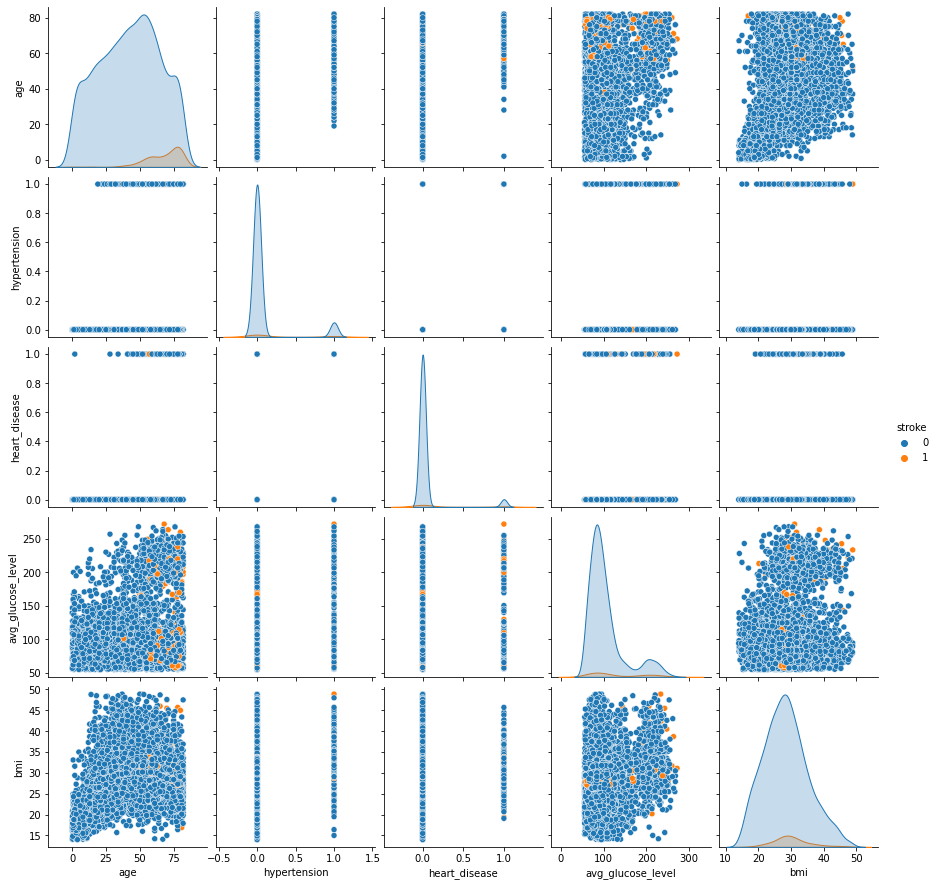

In [14]:
sns.pairplot(data = df, hue = 'stroke') # pairplot with hue stroke
plt.show()

A histogram is a graphical representation of the distribution of a dataset. It is an estimate of the probability distribution of a continuous variable.

Histograms are useful for visualizing the distribution of a continuous variable, and can be used to identify patterns, outliers, and trends in the data. They can also be used to compare the distribution of multiple variables or groups.

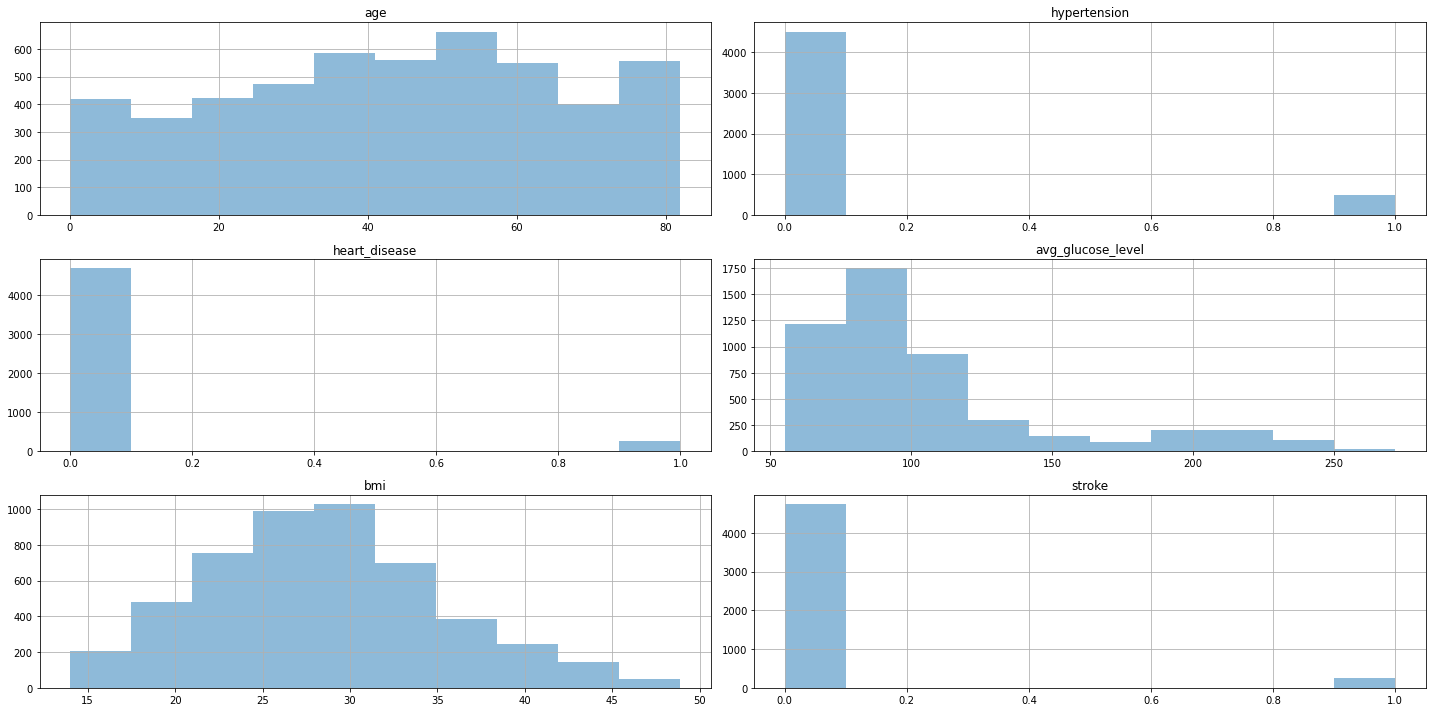

In [15]:
df.hist(alpha=0.5, figsize=(20, 10)) # plotting histogram
plt.tight_layout() # to automatically adjust subplots
plt.show() # to show the plots

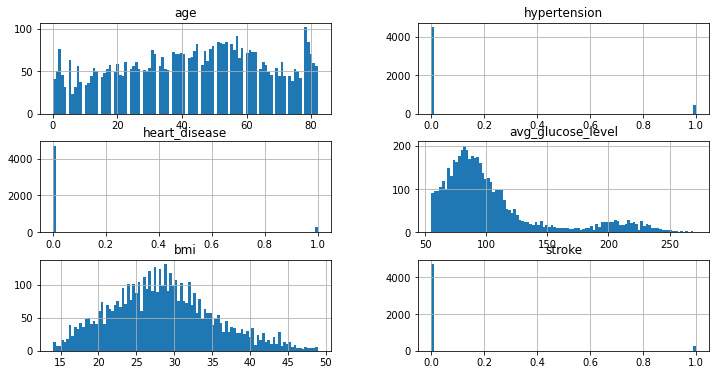

In [16]:
columns = ['gender','age', 'hypertension', 'heart_disease','ever_married','work_type','Residence_type','avg_glucose_level', 'bmi','smoking_status', 'stroke']
df[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2));

A box plot is a standardized way of displaying the distribution of data based on five number summary ("minimum", first quartile (Q1), median, third quartile (Q3), and "maximum"). 

Box plot is used to identify identifiers.

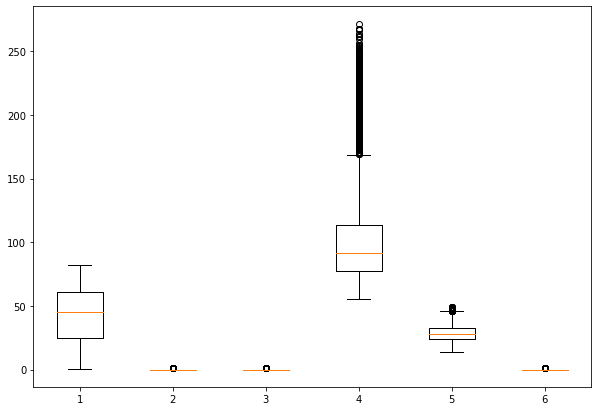

In [17]:
# selecting columns using location name

x=df.loc[:,['age','hypertension','heart_disease','avg_glucose_level','bmi','stroke']]

fig=plt.figure(figsize=(10,7))
plt.boxplot(x) # we can check for outliers by using boxplot
plt.show()

Standardization is a process of transforming a variable so that it has a mean of 0 and a standard deviation of 1. This is done by subtracting the mean from each value and dividing by the standard deviation. 

Standardization can make the identification of outliers more reliable. Since the standard deviation of the standardized variable is 1, an observation with a z-score greater than 3 or less than -3 can be considered an outlier.

In [18]:
# transforming data 
# Standardization

scaler = StandardScaler()
scaled = scaler.fit_transform(x)

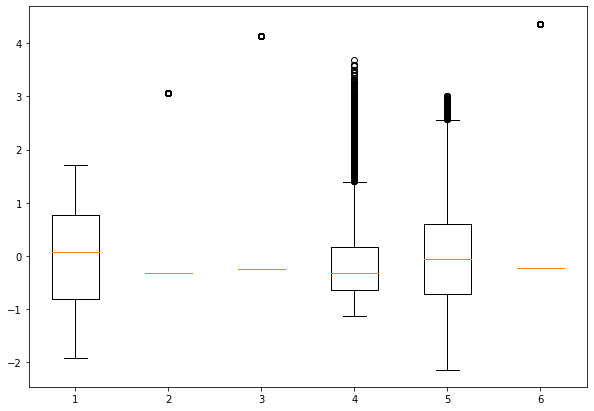

In [19]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(scaled)
plt.show()

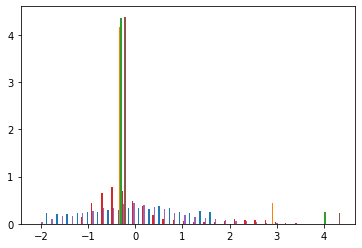

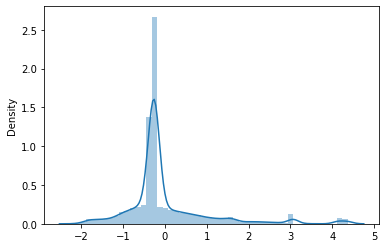

In [20]:
plt.hist(scaled, 30, density=True);
plt.show() 
sx = sns.distplot(scaled)
plt.show()

Normalization is a process of transforming a variable so that it is in a specific range, usually between 0 and 1. This is done by subtracting the minimum value from each value and dividing by the range (difference between the maximum and minimum values).

Normalization allows for the comparison of variables with different scales. By normalizing both variables, they can be compared on the same scale.

In [21]:
# Normalizing data

min_max = MinMaxScaler(feature_range=(0, 1))
normalized_data = min_max.fit_transform(x)

columns = ['age', 'hypertension', 'heart_disease','avg_glucose_level', 'bmi', 'stroke']
data_set = pd.DataFrame(normalized_data ,columns=columns)

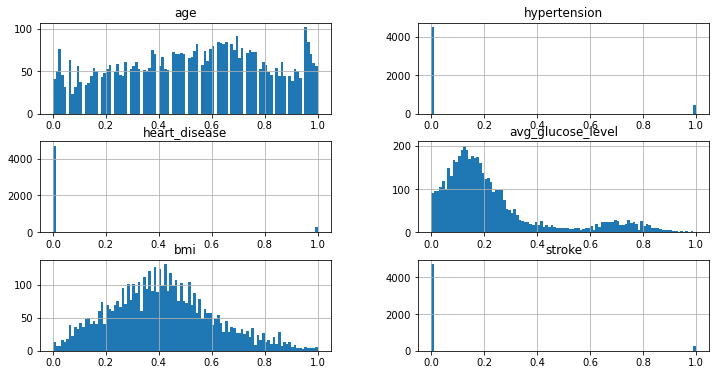

In [22]:
columns = ['age', 'hypertension', 'heart_disease','avg_glucose_level', 'bmi', 'stroke']
data_set[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2))
plt.show()

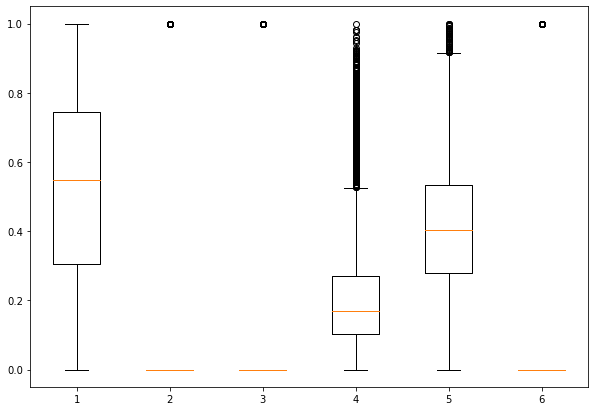

In [23]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(normalized_data)
plt.show()

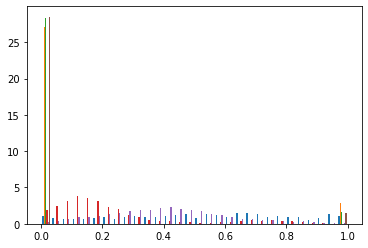

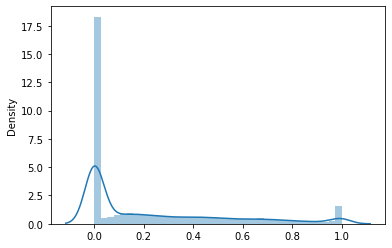

In [24]:
# normalized histogram

plt.hist(normalized_data, 30, density=True);
plt.show()
nx = sns.distplot(normalized_data)
plt.show()

Discretization, also known as binning or quantization, is a process of grouping a set of continuous or numerical data into a smaller set of discrete "bins" or intervals. This process is used to convert continuous variables into categorical or ordinal variables, which can be more easily analyzed and visualized.

Discretization can be useful when creating visualizations, such as histograms. Discretizing the variable into bins can make it easier to see patterns and trends in the data.

Some machine learning algorithms, such as decision trees, can handle categorical variables better than continuous variables. Discretizing a continuous variable can make it more suitable as an input for these algorithms.

In [25]:
# Discretization
# to convert continuous data into discrete data

kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
kbins_data = kbins.fit_transform(x)

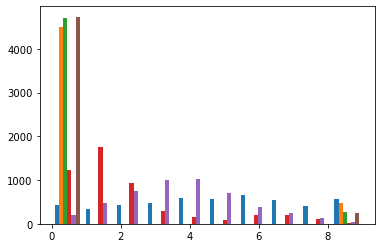

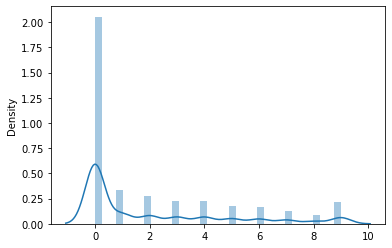

In [26]:
plt.hist(kbins_data, bins=10)
plt.show()
nx = sns.distplot(kbins_data)
plt.show()

A heatmap is a graphical representation of data in which individual values are represented as colors. It is used to visualize the relationship between two or more variables by encoding values of one variable as colors on a 2D grid.

 Heatmaps can be used to compare multiple data sets and identify similarities and differences between them.

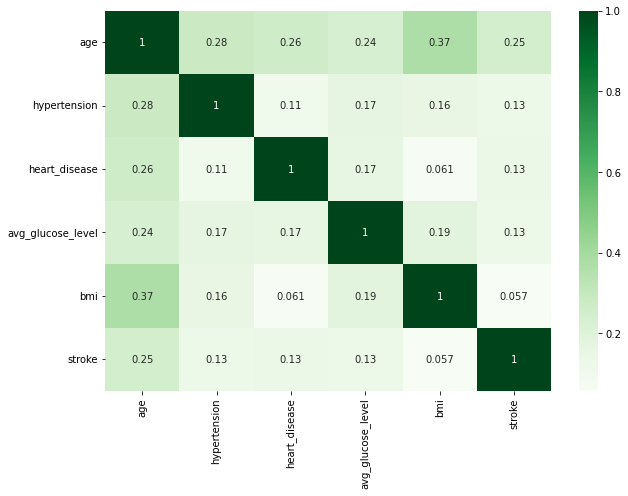

In [27]:
# plotting correlation matrix to check the relation between each feature

fig = plt.figure(figsize =(10, 7))
sns.heatmap(df.corr(), annot = True, cmap = 'Greens')
plt.show()

### Categorical Feature: Gender

In [28]:
# comparing the stroke by gender

df.groupby(['gender','stroke'])['stroke'].count() 

gender  stroke
Female  0         2767
        1          140
Male    0         1966
        1          108
Name: stroke, dtype: int64

The first plot is a bar plot of the mean of the 'stroke' column grouped by the 'gender' column. The second plot is a count plot of the 'gender' column with the hue set to the 'stroke'. 

The first plot is showing the average of stroke for each gender, and the second plot is showing the count of each gender who had a stroke and who didn't have a stroke. 

This code is useful to understand the relation between gender and stroke and how much percentage of people with specific gender had stroke.

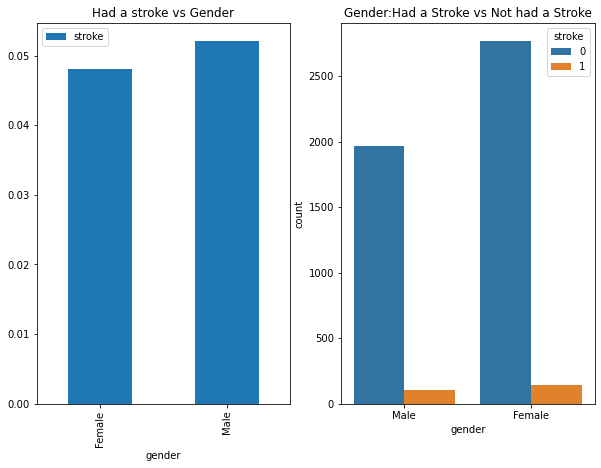

In [29]:
# plotting graph based on stroke and gender

f,ax=plt.subplots(1,2,figsize=(10,7))
df[['gender','stroke']].groupby(['gender']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Had a stroke vs Gender')
sns.countplot('gender',hue='stroke',data=df,ax=ax[1])
ax[1].set_title('Gender:Had a Stroke vs Not had a Stroke')
plt.show()

### Categorical Feature: Hypertension

In [30]:
# comparing the stroke by hypertension

df.groupby(['hypertension','stroke'])['stroke'].count() 

hypertension  stroke
0             0         4320
              1          182
1             0          413
              1           66
Name: stroke, dtype: int64

The first plot is a bar plot of the mean of the 'stroke' column grouped by the 'hypertension' column. The second plot is a count plot of the 'hypertension' column with the hue set to the 'stroke'.

The first plot is showing the average of stroke for each hypertension status, and the second plot is showing the count of each hypertension status who had a stroke and who didn't have a stroke. 

This code is useful to understand the relation between hypertension and stroke and how much percentage of people with hypertension had stroke.


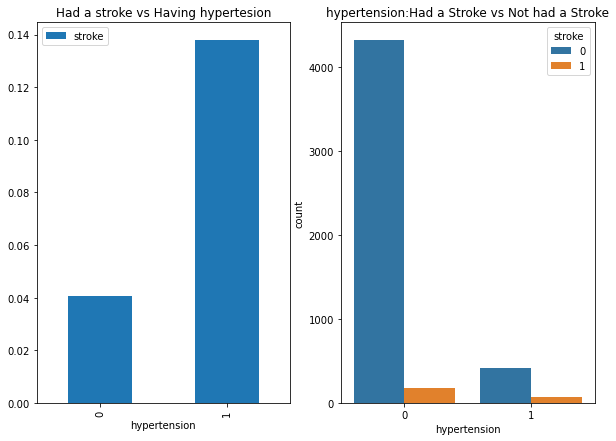

In [31]:
# plotting graph based on stroke and hypertension

f,ax=plt.subplots(1,2,figsize=(10,7))
df[['hypertension','stroke']].groupby(['hypertension']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Had a stroke vs Having hypertesion')
sns.countplot('hypertension',hue='stroke',data=df,ax=ax[1])
ax[1].set_title('hypertension:Had a Stroke vs Not had a Stroke')
plt.show()

### Categorical Feature: Heart Disease

In [32]:
# comparing the stroke by heart disease

df.groupby(['heart_disease','stroke'])['stroke'].count() 

heart_disease  stroke
0              0         4505
               1          201
1              0          228
               1           47
Name: stroke, dtype: int64

The first plot is a bar plot of the mean of the 'stroke' column grouped by the 'heart_disease' column. The second plot is a count plot of the 'heart_disease' column with the hue set to the 'stroke'.

The first plot is showing the average of stroke for each heart disease status, and the second plot is showing the count of each heart disease status who had a stroke and who didn't have a stroke.

This code is useful to understand the relation between heart disease and stroke and how much percentage of people with heart disease had stroke.

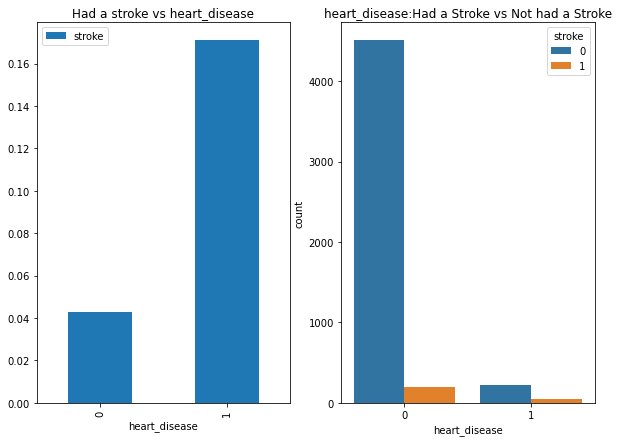

In [33]:
# plotting graph based on stroke and heart disease

f,ax=plt.subplots(1,2,figsize=(10,7))
df[['heart_disease','stroke']].groupby(['heart_disease']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Had a stroke vs heart_disease')
sns.countplot('heart_disease',hue='stroke',data=df,ax=ax[1])
ax[1].set_title('heart_disease:Had a Stroke vs Not had a Stroke')
plt.show()

### Smoking Status

The first plot is a bar plot of the count of observations for each category of the 'smoking_status' column, using different colors for each category. The second plot is a count plot of the 'smoking_status' column with the hue set to the 'stroke'.  

The first plot is showing the number of people for each smoking status and the second plot is showing the count of each smoking status who had a stroke and who didn't have a stroke.

This code is useful to understand the relation between smoking status and stroke and how many people of each smoking status had a stroke.

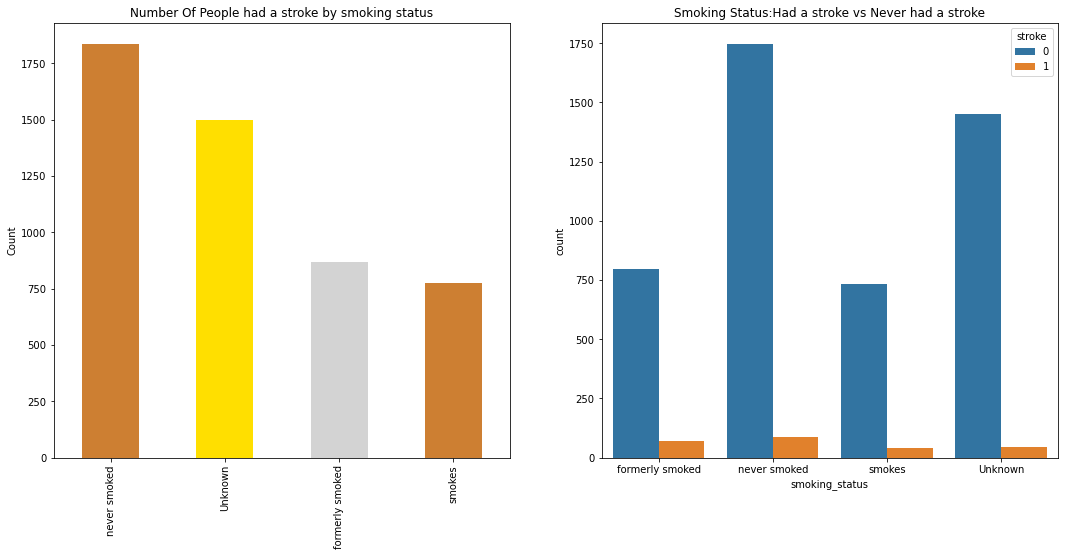

In [34]:
# plotting graph based on stroke and smoking status

f,ax=plt.subplots(1,2,figsize=(18,8))
df['smoking_status'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of People had a stroke by smoking status')
ax[0].set_ylabel('Count')
sns.countplot('smoking_status',hue='stroke',data=df,ax=ax[1])
ax[1].set_title('Smoking Status:Had a stroke vs Never had a stroke')
plt.show()

### Checking minimum, maximum and average values

In [35]:
print('<---------------------- Age ---------------------->')
print('Oldest Person was of:',df['age'].max(),'Years')
print('Youngest Person was of:',df['age'].min(),'Years')
print('Average Age in the data:',df['age'].mean(),'Years')
print('<---------------------- Glucose Level ---------------------->')
print('Maximum "Average Glucose Level" in data:',df['avg_glucose_level'].max())
print('Minimum "Average Glucose Level" in data:',df['avg_glucose_level'].min())
print('Average "Average Glucose Level" in data:',df['avg_glucose_level'].mean())
print('<---------------------- BMI ---------------------->')
print('Maximum "BMI" in data:',df['bmi'].max())
print('Minimum "BMI" in data:',df['bmi'].min())
print('Average "BMI" in data:',df['bmi'].mean())

<---------------------- Age ---------------------->
Oldest Person was of: 82.0 Years
Youngest Person was of: 0.08 Years
Average Age in the data: 43.4198594659707 Years
<---------------------- Glucose Level ---------------------->
Maximum "Average Glucose Level" in data: 271.74
Minimum "Average Glucose Level" in data: 55.12
Average "Average Glucose Level" in data: 105.94356153382824
<---------------------- BMI ---------------------->
Maximum "BMI" in data: 48.9
Minimum "BMI" in data: 14.0
Average "BMI" in data: 28.498173057619002


### Density of smoke status on the average glucose level in graphs

The first subplot is showing the distribution of 'avg_glucose_level' for observations where 'smoking_status' is "formerly smoked". The second subplot is showing the distribution of 'avg_glucose_level' for observations where 'smoking_status' is "smokes". The third subplot is showing the distribution of 'avg_glucose_level' for observations where 'smoking_status' is "never smoked". The forth subplot is showing the distribution of 'avg_glucose_level' for observations where 'smoking_status' is "Unknown".

This code is useful to understand the relation between smoking status and average glucose level and how they are distributed among different smoking status.

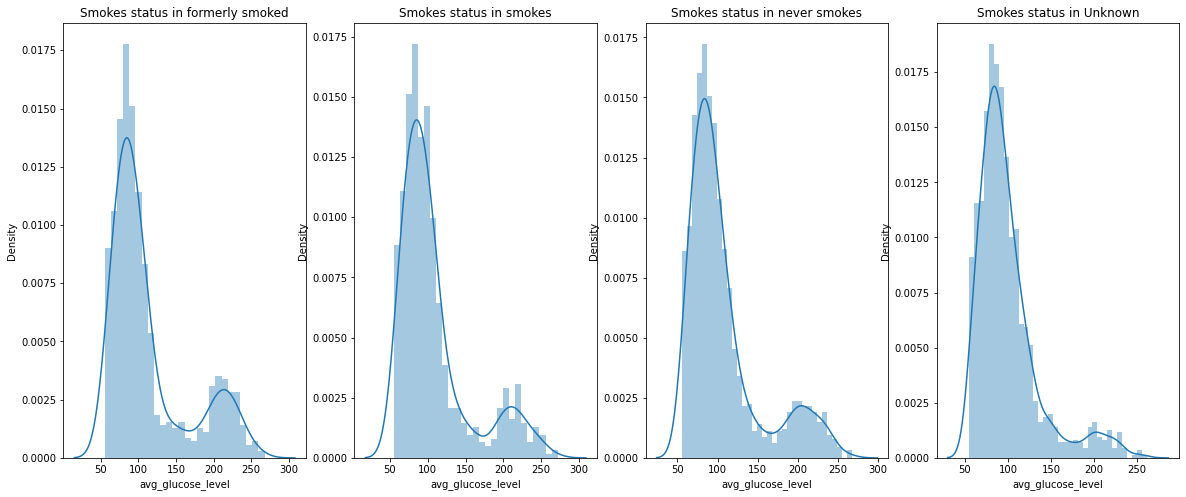

In [36]:
f,ax=plt.subplots(1,4,figsize=(20,8))
sns.distplot(df[df['smoking_status']=="formerly smoked"].avg_glucose_level,ax=ax[0])
ax[0].set_title('Smokes status in formerly smoked')
sns.distplot(df[df['smoking_status']=="smokes"].avg_glucose_level,ax=ax[1])
ax[1].set_title('Smokes status in smokes')
sns.distplot(df[df['smoking_status']== "never smoked"].avg_glucose_level,ax=ax[2])
ax[2].set_title('Smokes status in never smokes')
sns.distplot(df[df['smoking_status']== "Unknown"].avg_glucose_level,ax=ax[3])
ax[3].set_title('Smokes status in Unknown')
plt.show()

### Density of smoke status on the BMI index level in graphs

The first subplot is showing the distribution of 'bmi' for observations where 'smoking_status' is "formerly smoked". The second subplot is showing the distribution of 'bmi' for observations where 'smoking_status' is "smokes". The third subplot is showing the distribution of 'bmi' for observations where 'smoking_status' is "never smoked". The forth subplot is showing the distribution of 'bmi' for observations where 'smoking_status' is "Unknown".

This code is useful to understand the relation between smoking status and Body Mass Index and how they are distributed among different smoking status.

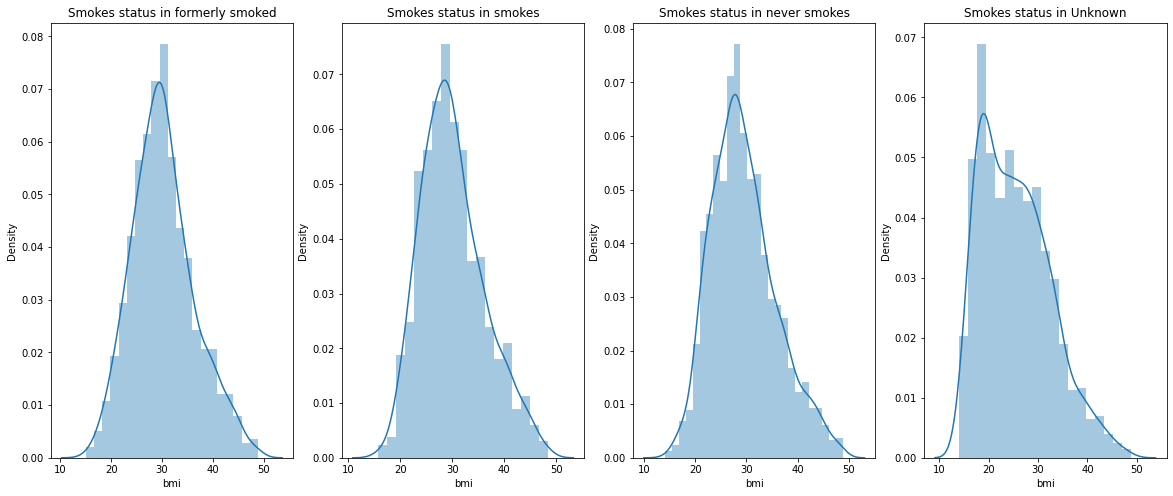

In [37]:
f,ax=plt.subplots(1,4,figsize=(20,8))
sns.distplot(df[df['smoking_status']=="formerly smoked"].bmi,ax=ax[0])
ax[0].set_title('Smokes status in formerly smoked')
sns.distplot(df[df['smoking_status']=="smokes"].bmi,ax=ax[1])
ax[1].set_title('Smokes status in smokes')
sns.distplot(df[df['smoking_status']== "never smoked"].bmi,ax=ax[2])
ax[2].set_title('Smokes status in never smokes')
sns.distplot(df[df['smoking_status']== "Unknown"].bmi,ax=ax[3])
ax[3].set_title('Smokes status in Unknown')
plt.show()

Converting the age column into age band in new column age_band. Because we can compare the people got stroke based 
on age also, since single value is difficult to compare. We made it as band.

### Label Encoding

Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated.

In [38]:
df.insert(2,'age_band', np.zeros) # creating a new column named age_band

In [39]:
df.loc[df['age']<=16,'age_band']=0 # if age is less than or equal to 0 we will mark it as 0 in age_band
df.loc[(df['age']>16)&(df['age']<=32),'age_band']=1 # if between 16 and 32 mark as 1
df.loc[(df['age']>32)&(df['age']<=48),'age_band']=2 # if between 32 and 48 mark as 2
df.loc[(df['age']>48)&(df['age']<=64),'age_band']=3 # if between 48 and 64 mark as 3
df.loc[df['age']>64,'age_band']=4 # if greater than 64 mark as 4
df.drop(columns= "age", inplace=True)
df["age_band"]=df['age_band'].astype(str).astype(int)
df.head()

,gender,age_band,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,4,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,4,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,3,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,4,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,4,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


Checking the number of people in each band

In [40]:
df['age_band'].value_counts().to_frame().style.background_gradient(cmap='binary')

,age_band
3,1229
2,1067
4,1020
1,895
0,770


In [41]:
# Label Encoding
# Converting everything into binary or numerical data as its easy to interpret with them

df['gender'] = df['gender'].map({'Female':1,'Male':0})
df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0})
df['work_type'] = df['work_type'].map({'Private': 0, 'Self-employed': 1, 'Govt_job':2, 'children':3})
df['Residence_type'] = df['Residence_type'].map({'Urban': 1, 'Rural':0})
df['smoking_status'] = df['smoking_status'].map({'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3})

In [42]:
df.dtypes ## checking data type after converting them

gender                 int64
age_band               int64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

### Splitting data

Splitting the dataframe into two parts, training and testing, with 40% of the data going into the testing dataset and 60% of the data going into the training dataset. 

The random_state parameter is set to 0, this is used to initialize the internal random number generator, which will decide the splitting of data into train and test indices. 

The stratify parameter is set to df['stroke'] which makes sure that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

In [43]:
# splitting data set into test and train for evaluating model

#X = df[df.columns[:-1]]
#y = df[df.columns[-1:]]


# Split data into training and test sets
train,test=train_test_split(df,test_size=0.4,random_state=0,stratify=df['stroke'])
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split training set into training and validation sets
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

train_X = train[train.columns[:-1]]
train_Y = train[train.columns[-1:]]
test_X = test[test.columns[:-1]]
test_Y = test[test.columns[-1:]]
X = df[df.columns[:-1]]
Y = df["stroke"]
len(train_X), len(train_Y), len(test_X), len(test_Y)

(2988, 2988, 1993, 1993)

## Machine Learning Models

### Getting accuracy score using KNN Classifier

Pipeline and GridSearchCV are used to perform a grid search for the best hyperparameters of a k-nearest neighbors (KNN) classifier. The pipeline first applies the MinMaxScaler() to the data, this is used to scale the data between 0 and 1. Then it applies the KNeighborsClassifier() to the data.

The scoring parameter is set to 'accuracy' and the cv parameter is set to 5, which means that the grid search will use 5-fold cross-validation to evaluate the model.

In [44]:
start_time = time.time()

knn_pipe = Pipeline([('mms', MinMaxScaler()),('knn', KNeighborsClassifier())])

params = [{'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
         'knn__weights': ['uniform', 'distance'],
         'knn__leaf_size': [10, 20, 30, 40]}]

gs_knn = GridSearchCV(knn_pipe,param_grid=params,scoring='accuracy',cv=5)
gs_knn.fit(train_X, train_Y)
print(gs_knn.best_params_)

# accuracy
prediction_knn = gs_knn.predict(test_X)
acc_knn = metrics.accuracy_score(prediction_knn,test_Y)
print('The accuracy of the KNN is',acc_knn)


end_time = time.time()
print("Total time: "+str(end_time-start_time))

{'knn__leaf_size': 10, 'knn__n_neighbors': 10, 'knn__weights': 'uniform'}
The accuracy of the KNN is 0.9503261414952333
Total time: 19.66538405418396


This code is using a loop to iterate through a range of k-values from 1 to 30, and for each k-value, it creates a KNeighborsClassifier object with that value of k. Then it trains the classifier on the training data and makes predictions on the test data. It then calculates and prints the confusion matrix, classification report, and accuracy score for each k-value. 

Then it uses the Matplotlib's plot() function to plot a graph with the k-values on the x-axis and the accuracy scores on the y-axis. The function also return the plot. This code block can be used to find the optimal value of k for the KNN classifier by observing the graph.

[[1803   91]
 [  92    7]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1894
           1       0.07      0.07      0.07        99

    accuracy                           0.91      1993
   macro avg       0.51      0.51      0.51      1993
weighted avg       0.91      0.91      0.91      1993

Correct no.of predictions = 1810
Total no.of predictions = 1993

                       -------------------------------------------------------                      

[[1886    8]
 [  99    0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1894
           1       0.00      0.00      0.00        99

    accuracy                           0.95      1993
   macro avg       0.48      0.50      0.49      1993
weighted avg       0.90      0.95      0.92      1993

Correct no.of predictions = 1886
Total no.of predictions = 1993

                       -------------------------------------

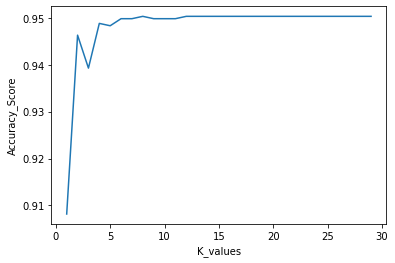

In [45]:
# plotting k-value vs accuracy score

def knncheck():
    x = test_Y.to_numpy()
    accuracy=np.array([])
    kvalues=np.array([])
    for i in range(1,30):
        classifier = KNeighborsClassifier(n_neighbors=i)  
        classifier.fit(train_X, train_Y)
        pred_Y = classifier.predict(test_X)
        print(confusion_matrix(test_Y, pred_Y))  
        print(classification_report(test_Y, pred_Y))  
        a = accuracy_score(test_Y, pred_Y)
        accuracy = np.append(accuracy,a)
        kvalues = np.append(kvalues,i)

        crct_prediction = 0
        for i in range(len(pred_Y)):
            if x[i] == pred_Y[i]:
                crct_prediction += 1

        print('Correct no.of predictions = '+str(crct_prediction))
        total_predictions = len(test_Y)
        print('Total no.of predictions = '+str(total_predictions))
        print()
        print("                       -------------------------------------------------------                      ")
        print()
    plt.plot(kvalues, accuracy)
    plt.xlabel('K_values')
    plt.ylabel('Accuracy_Score')
    return 
knncheck()

In [46]:
# just trying

classifier = KNeighborsClassifier(n_neighbors=10) 
classifier.fit(train_X, train_Y)
pred_Y = classifier.predict(test_X)

print(confusion_matrix(test_Y,pred_Y))
print(classification_report(test_Y,pred_Y))

[[1893    1]
 [  99    0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1894
           1       0.00      0.00      0.00        99

    accuracy                           0.95      1993
   macro avg       0.48      0.50      0.49      1993
weighted avg       0.90      0.95      0.93      1993



Getting number of correct predictions

In [47]:
# converting dataframe to numpy

x = test_Y.to_numpy()

crct_prediction = 0
for i in range(len(pred_Y)):
    if x[i] == pred_Y[i]:
        crct_prediction += 1

print('Correct no.of predictions = '+str(crct_prediction))
total_predictions = len(x)
print('Total no.of predictions = '+str(total_predictions))

Correct no.of predictions = 1893
Total no.of predictions = 1993


K-fold cross-validation is a technique used to evaluate the performance of machine learning models. It is a resampling method where the data is split into k subsets, or "folds", and the model is trained and evaluated k times, each time using a different fold as the testing data and the remaining k-1 folds as the training data.

The goal of k-fold cross-validation is to estimate the performance of a model on unseen data by training the model on a variety of different training/testing splits. 

In [48]:
# K-fold validation

k_folds = KFold(n_splits = 5)
scores = cross_val_score(classifier, train_X, train_Y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.94983278 0.95652174 0.94314381 0.94974874 0.95142379]
Average CV Score:  0.9501341714144861
Number of CV Scores used in Average:  5


The KFold function is used to create a KFold cross-validation iterator, in this case, it is set to split the data into 5 folds.

The cross_val_score function is then used to evaluate the classifier on the different folds of the data. It returns an array of scores, one for each fold.

This code block can be used to check how well the model performs and how consistent it is across different portions of the data. If the average score is high and the range of scores is low, it means the model is performing well and is consistent across the different portions of the data.

### Getting accuracy score using Logistic Regression

Training a logistic regression model on the training dataset and then using the trained model to make predictions on the test dataset.

After the model is trained, it uses the .predict() method to make predictions on the test feature data 'test_X'. The predictions are stored in the variable 'prediction_lr'.

Finally, it uses the accuracy_score() function from scikit-learn's metrics module to calculate the accuracy of the model by comparing the predicted labels(prediction_lr) with the true labels(test_Y). 

In [49]:
model_lr = LogisticRegression()
model_lr.fit(train_X,train_Y)
prediction_lr = model_lr.predict(test_X)
acc_lr = metrics.accuracy_score(prediction_lr,test_Y)
print('The accuracy of the Logistic Regression is',acc_lr)

The accuracy of the Logistic Regression is 0.9503261414952333


In [50]:
print(acc_lr)

0.9503261414952333


GridSearchCV is used to perform a grid search cross-validation, here on a logistic regression model.

First, it creates a dictionary grid of possible hyperparameters for the logistic regression model, which in this case are the inverse regularization strength 'C' and the type of regularization "penalty" ("l1" for Lasso, "l2" for Ridge).

Next, it creates an instance of the GridSearchCV() object and assigns it to the variable 'logreg_cv' and passes in the logistic regression model, the hyperparameter grid, and the number of folds for cross-validation.

In [51]:
start_time = time.time()

# Grid search cross validation

# Creating the hyperparameter grid
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge

# Instantiating logistic regression classifier
logreg = LogisticRegression()

# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, grid, cv = 5)
logreg_cv.fit(train_X,train_Y)

# Print the tuned parameters and score

print("Tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
acc_lr = logreg_cv.best_score_
print("Accuracy :", acc_lr)

end_time = time.time()
print("Time taken",end_time-start_time)

Tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
Accuracy : 0.9501341714144861
Time taken 2.2412281036376953


Here, KFold and cross_val_score is used to perform k-fold cross-validation on a logistic regression model.

First, it creates an instance of the KFold class with 5 splits(folds) and assigns it to the variable k_folds. This will train and evaluate the logistic regression model on 5 different train/test splits of the data, each time using a different fold as the testing set.



In [52]:
# k fold validation

k_folds = KFold(n_splits = 5)
scores = cross_val_score(logreg, train_X, train_Y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.94816054 0.95652174 0.94314381 0.94974874 0.95142379]
Average CV Score:  0.9497997232539509
Number of CV Scores used in Average:  5


predict_proba function is used on the test data (test_X) to predict the class probabilities. It extracts the probability of the positive class (1) and assigns it to the variable score_Y.

It then uses the roc_curve function to compute the false positive rate (fpr), true positive rate (tpr) and thresholds for different classification threshold. It then calculates the area under the ROC curve (AUC) using roc_auc_score function.

Finally, it plots the ROC curve by plotting the false positive rate (fpr) on the x-axis and true positive rate (tpr) on the y-axis. It also plots a line representing a random classifier.

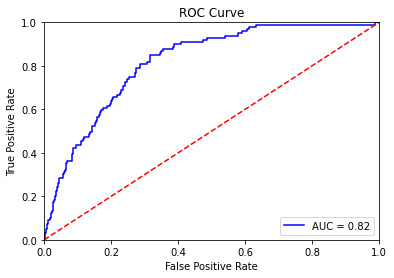

In [53]:
# Fit the logistic regression model on the training data
clf = LogisticRegression()
clf.fit(train_X, train_Y)

# Predict the class probabilities on the test data
score_Y = clf.predict_proba(test_X)[:,1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(test_Y, score_Y)

# Compute the AUC (Area Under the Curve)
auc = roc_auc_score(test_Y, score_Y)

# Plot the ROC curve
plt.plot(fpr, tpr, 'b-', label='AUC = %0.2f'% auc)
plt.plot([0, 1], [0, 1], 'r--')  # random classifier line
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


### Getting accuracy score using Decision Tree Classifier

In [54]:
# Using decision tree classifier to get the accuracy.

model_dt = DecisionTreeClassifier()
model_dt.fit(train_X,train_Y)
prediction_dt = model_dt.predict(test_X)
acc_dt = metrics.accuracy_score(prediction_dt,test_Y)
print('The accuracy of the Decision Tree is',acc_dt)

The accuracy of the Decision Tree is 0.907175112895133


In [55]:
print(acc_dt)

0.907175112895133


Using k-fold cross validation to evaluate the performance of a decision tree model.

The k-fold object (k_folds) is created with the parameter "n_splits" set to 5, meaning that the training dataset will be divided into 5 equally sized "folds." The "cross_val_score" function is then used to compute the accuracy of the model on each of the 5 folds.

The code then prints out the individual cross validation scores, the mean of all the scores, and the number of scores used to calculate the mean.

In [56]:
# k fold validation

k_folds = KFold(n_splits = 5)
scores = cross_val_score(model_dt, train_X, train_Y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.89632107 0.90301003 0.89966555 0.90117253 0.91792295]
Average CV Score:  0.903618426581066
Number of CV Scores used in Average:  5


In [57]:
k_folds = KFold(n_splits = 5)
scores = cross_val_score(model_dt, train_X, train_Y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.89632107 0.90133779 0.90468227 0.90619765 0.91457286]
Average CV Score:  0.9046223312773455
Number of CV Scores used in Average:  5


In [58]:
clf = DecisionTreeClassifier(random_state=42)
k_folds = KFold(n_splits = 5)
scores = cross_val_score(model_dt, train_X, train_Y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.89799331 0.90133779 0.89632107 0.90284757 0.91959799]
Average CV Score:  0.9036195470104144
Number of CV Scores used in Average:  5


### Plotting a graph between max_depth values vs Accuracy_Score

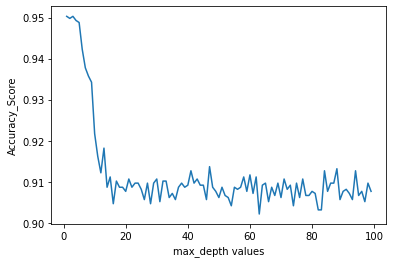

In [59]:
def max_depthcheck():
    x = test_Y.to_numpy()
    accuracy=np.array([])
    max_depth_values=np.array([])
    for i in range(1,100):
        para={'max_depth': i, 'min_samples_leaf': 1, 'min_samples_split': 2}
        dt=DecisionTreeClassifier(**para)
        dt.fit(train_X,train_Y)
        pred_Y = dt.predict(test_X)
        a = accuracy_score(test_Y,pred_Y)
        accuracy = np.append(accuracy,a)
        max_depth_values = np.append(max_depth_values,i)

        crct_prediction = 0
        for i in range(len(pred_Y)):
            if x[i] == pred_Y[i]:
                crct_prediction += 1
    plt.plot(max_depth_values, accuracy)
    plt.xlabel('max_depth values')
    plt.ylabel('Accuracy_Score')
    return 
max_depthcheck()

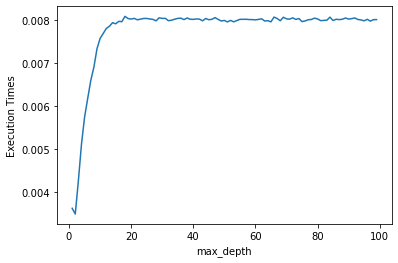

In [60]:
import time
def time_check():
    x = test_Y.to_numpy()
    execution_times = []
    accuracy=np.array([])
    max_depth_values=np.array([])
    for i in range(1,100):
        para={'max_depth': i, 'min_samples_leaf': 1, 'min_samples_split': 2}
        dt=DecisionTreeClassifier(**para)
        start_time = time.time()
        dt.fit(train_X,train_Y)
        end_time = time.time()
        execution_times.append(end_time - start_time)
        y_pred = dt.predict(test_X)
        a = accuracy_score(test_Y,y_pred)
        accuracy = np.append(accuracy,a)
        max_depth_values = np.append(max_depth_values,i)

        crct_prediction = 0
        for i in range(len(y_pred)):
            if x[i] == y_pred[i]:
                crct_prediction += 1
    plt.plot(max_depth_values, execution_times)
    plt.xlabel('max_depth')
    plt.ylabel('Execution Times')
    return
time_check()

### Hyper parameter tuning

Performing a grid search to tune the hyperparameters of a decision tree model. Grid search is conducted using the "GridSearchCV" class, with the "cv" parameter set to 5, means 5-fold cross validation will be used to evaluate the performance of the model for each combination of hyperparameters. 

The best parameters will be the combination of max_depth,min_samples_split,min_samples_leaf that results in the highest cross-validation score and the best score will be the highest cross-validation score obtained during the grid search.

In [61]:
param_grid = {'max_depth': [1, 2, 3, 4, 5],
              'min_samples_split': [2, 3, 4, 5],
              'min_samples_leaf': [1, 2, 3, 4, 5]}

grid_search = GridSearchCV(model_dt, param_grid, cv = 5)
grid_search.fit(train_X, train_Y)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score:  0.9501341714144861


In [62]:
test_predictions = grid_search.predict(test_X)
acc_dt = accuracy_score(test_Y, test_predictions)
print("Test set accuracy: ", acc_dt)

Test set accuracy:  0.9503261414952333


## Getting accuracy score using Support Vector Machine

In [93]:
# create a SVM classifier with a linear kernel
clf = svm.SVC(kernel='poly', C=0.1)

# train the classifier on the training data
clf.fit(train_X, train_Y)

# predict the class labels for the test data
pred_Y = clf.predict(test_X)

# evaluate the classifier's accuracy
acc_svm = clf.score(test_X, test_Y)
print("Accuracy:", acc_svm)

Accuracy: 0.9503261414952333


In [64]:
# k fold validation

k_folds = KFold(n_splits = 5)
scores = cross_val_score(clf, train_X, train_Y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.94983278 0.95652174 0.94314381 0.94974874 0.95142379]
Average CV Score:  0.9501341714144861
Number of CV Scores used in Average:  5


In [65]:
# hyperparameter tuning

from sklearn.model_selection import GridSearchCV 
  
# defining parameter range

param_grid = {'C': [0.1, 1],
              'kernel': ['linear', 'rbf', 'poly'],
              'degree': [1, 2, 3],
              'gamma': ['scale', 'auto']}
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(train_X, train_Y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END C=0.1, degree=1, gamma=scale, kernel=linear;, score=0.950 total time=  20.9s
[CV 2/5] END C=0.1, degree=1, gamma=scale, kernel=linear;, score=0.950 total time=  11.5s
[CV 3/5] END C=0.1, degree=1, gamma=scale, kernel=linear;, score=0.950 total time=  16.4s
[CV 4/5] END C=0.1, degree=1, gamma=scale, kernel=linear;, score=0.951 total time=  16.2s
[CV 5/5] END C=0.1, degree=1, gamma=scale, kernel=linear;, score=0.950 total time=   9.3s
[CV 1/5] END C=0.1, degree=1, gamma=scale, kernel=rbf;, score=0.950 total time=   0.1s
[CV 2/5] END C=0.1, degree=1, gamma=scale, kernel=rbf;, score=0.950 total time=   0.1s
[CV 3/5] END C=0.1, degree=1, gamma=scale, kernel=rbf;, score=0.950 total time=   0.1s
[CV 4/5] END C=0.1, degree=1, gamma=scale, kernel=rbf;, score=0.951 total time=   0.1s
[CV 5/5] END C=0.1, degree=1, gamma=scale, kernel=rbf;, score=0.950 total time=   0.1s
[CV 1/5] END C=0.1, degree=1, gamma=scale, kernel=pol

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1], 'degree': [1, 2, 3],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=3)

In [66]:
# print best parameter after tuning
print(grid.best_params_)
best_params = grid.best_params_  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 0.1, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}
SVC(C=0.1, degree=1, kernel='linear')


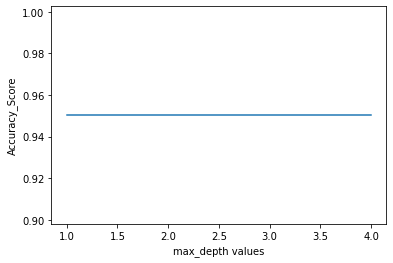

In [67]:
def max_depthcheck():
    x = test_Y.to_numpy()
    accuracy = np.array([])
    c = np.array([])
    for i in range(1,5):
        para=best_params
        svm_ = svm.SVC(**para)
        svm_.fit(train_X,train_Y)
        pred_Y = svm_.predict(test_X)
        a = accuracy_score(test_Y,pred_Y)
        accuracy = np.append(accuracy,a)
        c = np.append(c ,i)

        crct_prediction = 0
        for i in range(len(pred_Y)):
            if x[i] == pred_Y[i]:
                crct_prediction += 1
    plt.plot(c, accuracy)
    plt.xlabel('max_depth values')
    plt.ylabel('Accuracy_Score')
    return 
max_depthcheck()

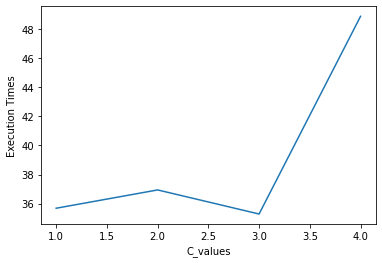

In [68]:
def time_check():
    execution_times = []
    x = test_Y.to_numpy()
    accuracy=np.array([])
    Cvalues=np.array([])
    for i in range(1,5):
        para={'C': i, 'kernel': 'linear'}
        Svm= svm.SVC(**para)
        start_time = time.time()
        Svm.fit(train_X,train_Y)
        end_time = time.time()
        execution_times.append(end_time - start_time)    
        y_pred = Svm.predict(test_X)
        a = accuracy_score(test_Y,y_pred)
        accuracy = np.append(accuracy,a)
        Cvalues = np.append(Cvalues,i)

        crct_prediction = 0
        for i in range(len(y_pred)):
            if x[i] == y_pred[i]:
                crct_prediction += 1
    plt.plot(Cvalues, execution_times)
    plt.xlabel('C_values')
    plt.ylabel('Execution Times')
    return  
time_check()

In [69]:
grid_predictions = grid.predict(test_X)
  
# print classification report
print(classification_report(test_Y, grid_predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1894
           1       0.00      0.00      0.00        99

    accuracy                           0.95      1993
   macro avg       0.48      0.50      0.49      1993
weighted avg       0.90      0.95      0.93      1993



In [88]:
acc_svm = clf.score(test_X, test_Y)
print("Accuracy:", acc_svm)

Accuracy: 0.9503261414952333


In [72]:
# creating the list and passing the accuracy scores we got

list_acc = [] 
list_acc.append(acc_knn)
list_acc.append(acc_lr)
list_acc.append(acc_dt)
list_acc.append(acc_svm)

In [73]:
print(list_acc)

[0.9503261414952333, 0.9501341714144861, 0.9503261414952333, 0.9503261414952333]


In [74]:
# getting the maximum accuracy score 

max_acc = max(list_acc)

In [75]:
print(max_acc)

0.9503261414952333


Our aim is to make a web application in which user can enter the necessary input values. And our machine learning model will predict the output and gives the maximum accuracy value so user can be warned in before.

## Comparision of models

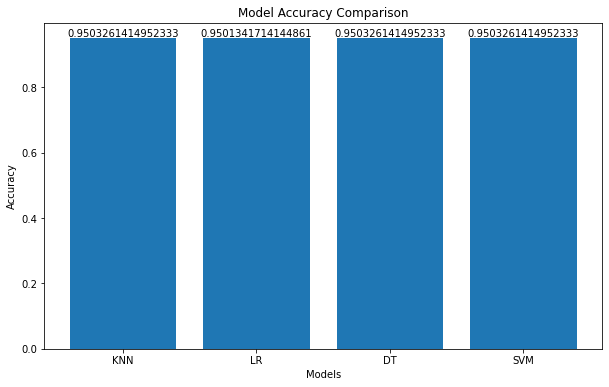

In [76]:
import matplotlib.pyplot as plt

# example data
models = ['KNN', 'LR', 'DT','SVM']
accuracies = list_acc

# create bar chart
plt.figure(figsize=(10,6))
barplot = plt.bar(models, accuracies)
plt.bar_label(barplot, labels = accuracies)

# add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

# show plot
plt.show()


### Understanding

#### Performing with normalized data

In [77]:
x=df.loc[:,['age_band','hypertension','heart_disease','avg_glucose_level','bmi','stroke']]

min_max = MinMaxScaler(feature_range=(0, 1))
normalized_data = min_max.fit_transform(x)

columns = ['age', 'hypertension', 'heart_disease','avg_glucose_level', 'bmi', 'stroke']
data_set = pd.DataFrame(normalized_data ,columns=columns)

In [78]:
df.shape

(4981, 11)

In [79]:
train_nor ,test_nor =train_test_split(data_set,test_size=0.3,random_state=0,stratify=df['stroke'])
train_X_nor = train[train.columns[:-1]]
train_Y_nor = train[train.columns[-1:]]
test_X_nor = test[test.columns[:-1]]
test_Y_nor = test[test.columns[-1:]]
X_nor = df[df.columns[:-1]]
Y_nor = df["stroke"]
len(train_X_nor), len(train_Y_nor), len(test_X_nor), len(test_Y_nor)

(2988, 2988, 1993, 1993)

In [80]:
model = LogisticRegression()
model.fit(train_X_nor,train_Y_nor)
prediction_lr = model.predict(test_X_nor)
acc_lr = metrics.accuracy_score(prediction_lr,test_Y_nor)
print('The accuracy of the Logistic Regression is',acc_lr)

The accuracy of the Logistic Regression is 0.9503261414952333


In [81]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Creating the hyperparameter grid
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge

# Instantiating logistic regression classifier
logreg = LogisticRegression()

# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, grid, cv = 5)
logreg_cv.fit(train_X_nor,train_Y_nor)

# Print the tuned parameters and score

print("Tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("Accuracy :",logreg_cv.best_score_)

Tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
Accuracy : 0.9501341714144861


Standardization can be done if the data is following guassian distribution.

The Shapiro-Wilk test is a statistical test that checks if a given sample of data comes from a normal distribution. The variable "alpha" is set to 0.05 which is used as the threshold for determining whether the data is normally distributed. 

The variable "stat" stores the test statistic and "p" stores the p-value. If the p-value is greater than the threshold (0.05), the sample is normally distributed cannot be rejected and the script prints 'Sample looks Gaussian' otherwise it prints 'Sample does not look Gaussian'.

In [82]:
from scipy.stats import shapiro

data = df
stat, p = shapiro(data)

alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian')
else:
    print('Sample does not look Gaussian')

Sample does not look Gaussian


## Trying to split data into test, train and validation

In [83]:
# splitting data set into test and train for evaluating model

X = df[df.columns[:-1]]
y = df[df.columns[-1:]]


# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


## K Nearest Neighbors

In [84]:
start_time = time.time()

knn_pipe = Pipeline([('mms', MinMaxScaler()),('knn', KNeighborsClassifier())])

params = [{'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
         'knn__weights': ['uniform', 'distance'],
         'knn__leaf_size': [10, 20, 30, 40]}]

gs_knn = GridSearchCV(knn_pipe,param_grid=params,scoring='accuracy',cv=5)
gs_knn.fit(X_train, y_train)
print(gs_knn.best_params_)

# accuracy
prediction_knn = gs_knn.predict(X_val)
acc_knn_val = metrics.accuracy_score(prediction_knn,y_val)
print('The accuracy of the KNN is',acc_knn_val)


end_time = time.time()
print("Total time: "+str(end_time-start_time))

{'knn__leaf_size': 10, 'knn__n_neighbors': 8, 'knn__weights': 'uniform'}
The accuracy of the KNN is 0.9623588456712673
Total time: 17.236571311950684


In [85]:
# Using grid search cv to find the best parameters and accuracy for knn model

param_grid = {'n_neighbors': [3,10, 15, 17, 19], 
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}

knn = KNeighborsClassifier()
y_val = np.ravel(y_val)
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_val, y_val)
best_params = grid_search.best_params_
print(best_params)
knn = KNeighborsClassifier(**best_params)
knn.fit(X_val, y_val)
accuracy_scores = cross_val_score(knn, X_val, y_val, cv = 5)
average_score = np.mean(accuracy_scores)
print("Accuracy_scores","-->",average_score)

{'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}
Accuracy_scores --> 0.9623584905660378


### Plotting the K-values vs Time Graph

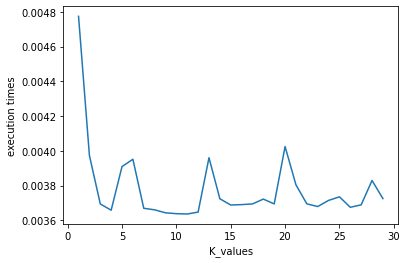

In [86]:
import time 
def knncheck():
    execution_times = []
    x = y_test.to_numpy()
    accuracy=np.array([])
    kvalues=np.array([])
    for i in range(1,30):
        para={'metric': 'euclidean', 'n_neighbors': i, 'weights': 'uniform'}
        knn=KNeighborsClassifier(**para)
        start_time = time.time()
        knn.fit(X_train,y_train)
        end_time = time.time()
        execution_times.append(end_time - start_time)
        y_pred = knn.predict(X_test)
        a = accuracy_score(y_test,y_pred)
        accuracy = np.append(accuracy,a)
        kvalues = np.append(kvalues,i)

        crct_prediction = 0
        for i in range(len(y_pred)):
            if x[i] == y_pred[i]:
                crct_prediction += 1
    plt.plot(kvalues, execution_times)
    plt.xlabel('K_values')
    plt.ylabel('execution times')
    return 
knncheck()

In [94]:
prediction_knn_test = gs_knn.predict(X_test)
acc_knn_test = metrics.accuracy_score(prediction_knn_test,y_test)
print('The accuracy of the KNN is',acc_knn_test)

The accuracy of the KNN is 0.9458375125376128


## Logistic Regression

In [95]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Creating the hyperparameter grid
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge

# Instantiating logistic regression classifier
logreg = LogisticRegression()

# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, grid, cv = 5)
logreg_cv.fit(train_X,train_Y)

# Print the tuned parameters and score

print("Tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
acc_lr = logreg_cv.best_score_
print("Accuracy :", acc_lr)


Tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
Accuracy : 0.9501341714144861


In [96]:
prediction_lr_test = logreg_cv.predict(X_test)
acc_lr_test = metrics.accuracy_score(prediction_lr_test,y_test)
print(acc_lr_test)

0.9458375125376128
